## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

## One run plots:

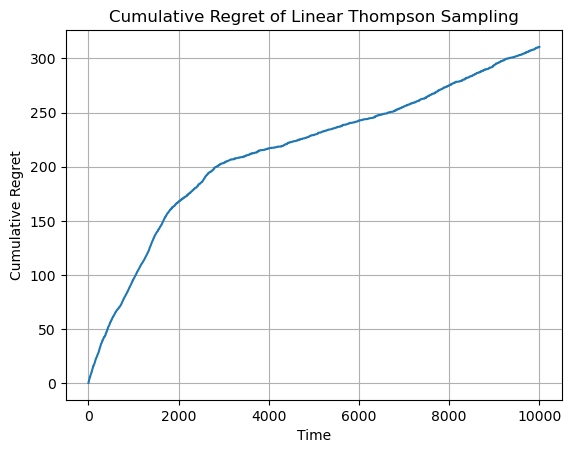

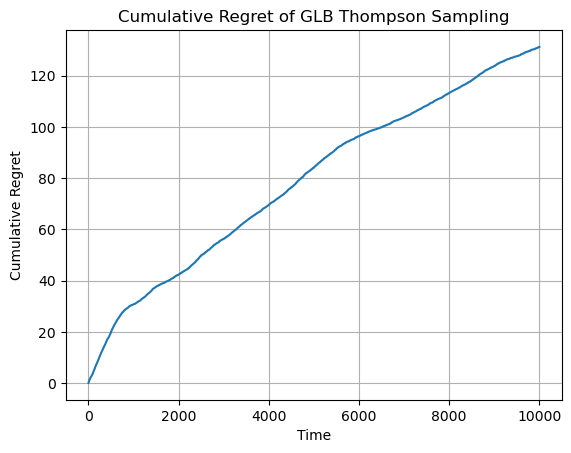

Runs progress:   0%|          | 0/3 [00:00<?, ?it/s]

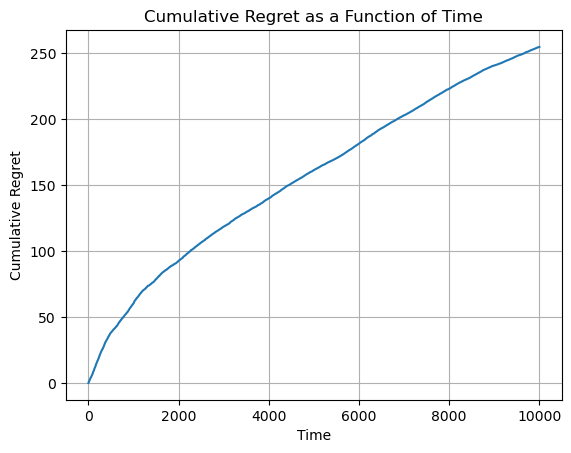

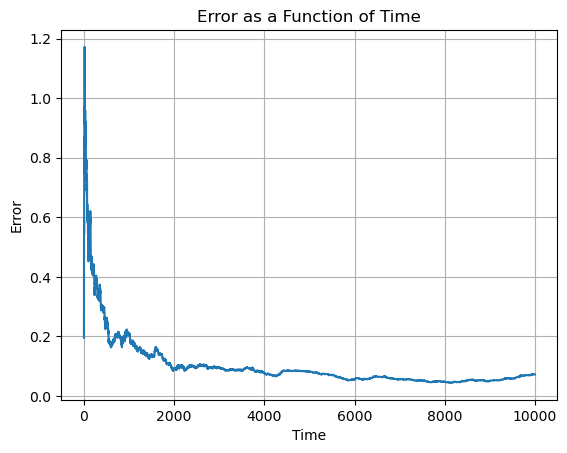

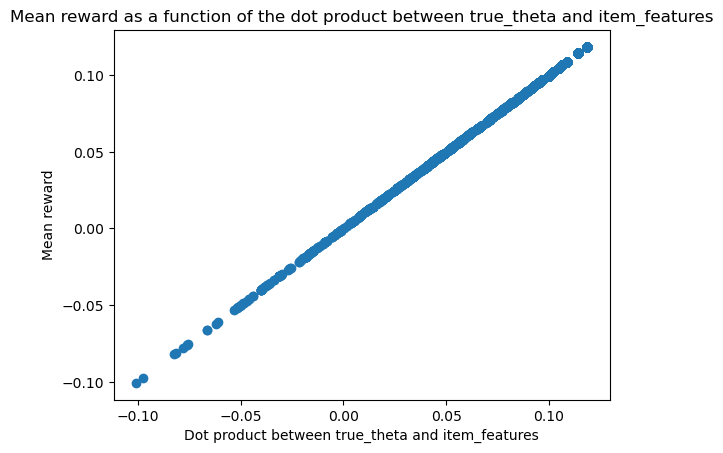

Runs progress:   0%|          | 0/3 [00:00<?, ?it/s]

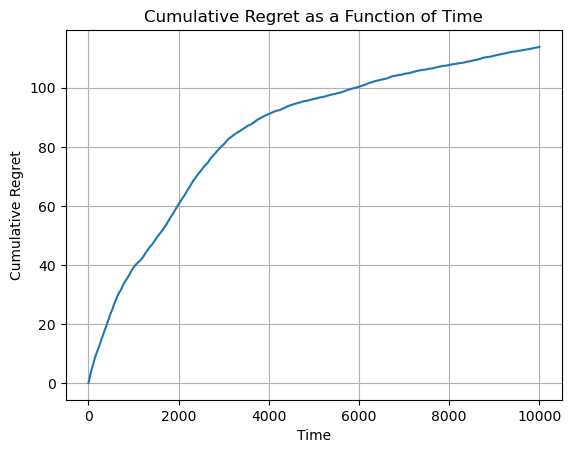

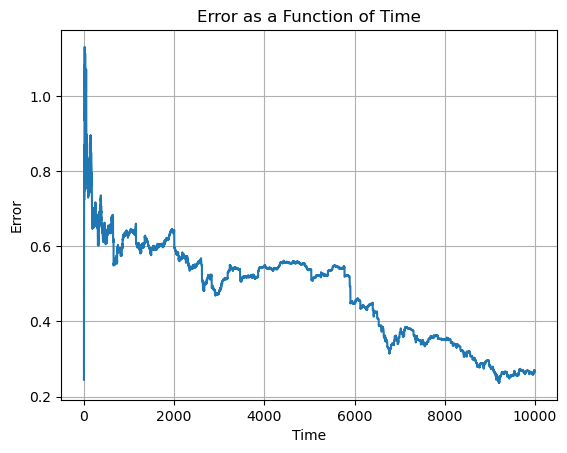

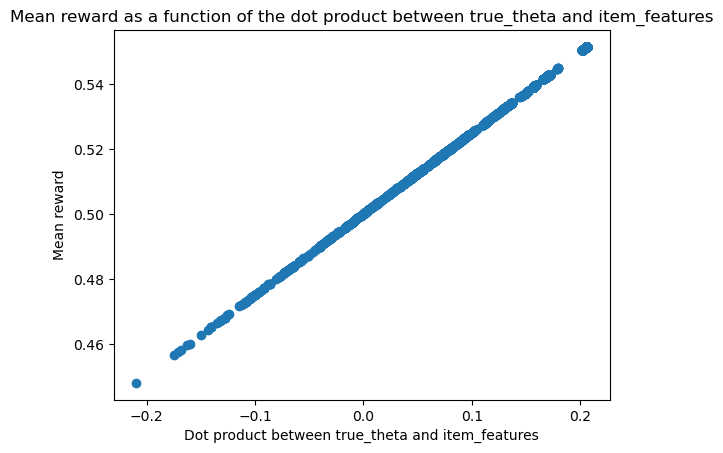

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors, dot_products, mean_rewards = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")

num_rounds = 10000
regrets2, errors2, dot_products2, mean_rewards2 = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")

run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, 3, alpha=1, type = 'linear')
run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, 3, alpha=1, type = 'logistic')

## Linear Bandit over 100 runs

Total progress:   0%|          | 0/100 [00:00<?, ?it/s]

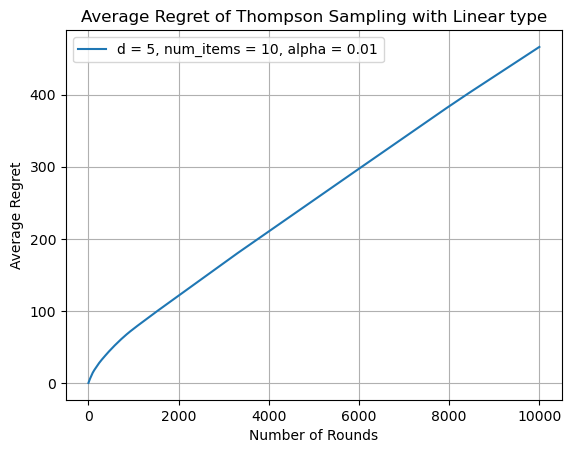

In [3]:
# Setup
d_values = [5]
num_items = [10]
alpha_values = [0.01]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 100
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'linear')

## Generalized Linear Bandit over 50 runs

Runs progress:   0%|          | 0/20 [00:00<?, ?it/s]

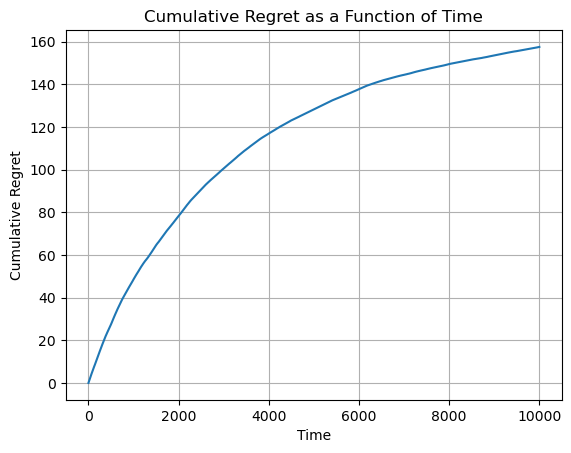

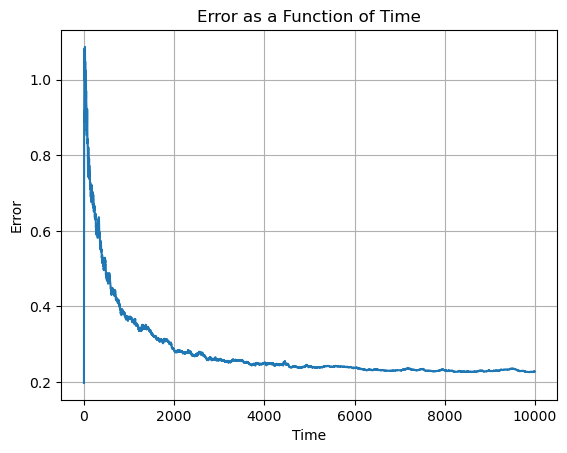

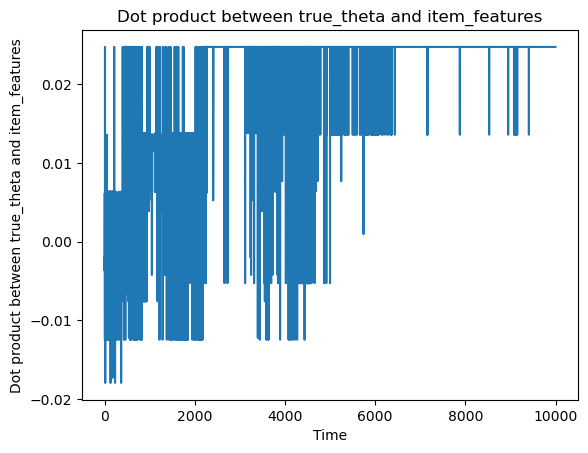

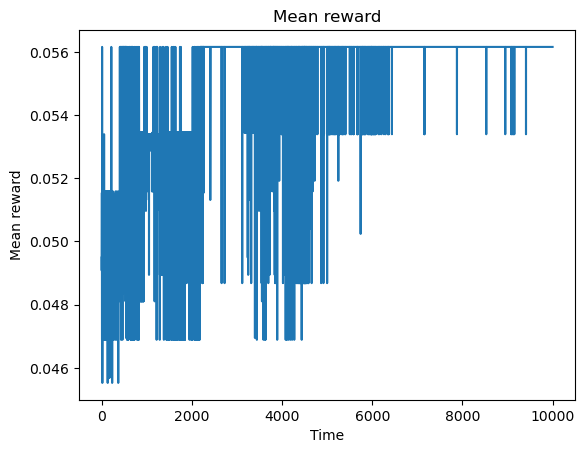

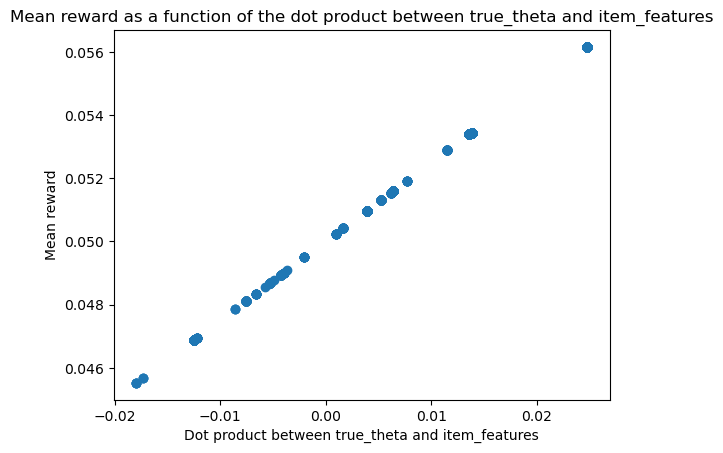

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
# Initialize the environment and the bandit.
d = 10
num_items = 30
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d
num_rounds = 10000

run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs= 20, alpha=0.1, type = 'logistic')


Runs progress:   0%|          | 0/20 [00:00<?, ?it/s]

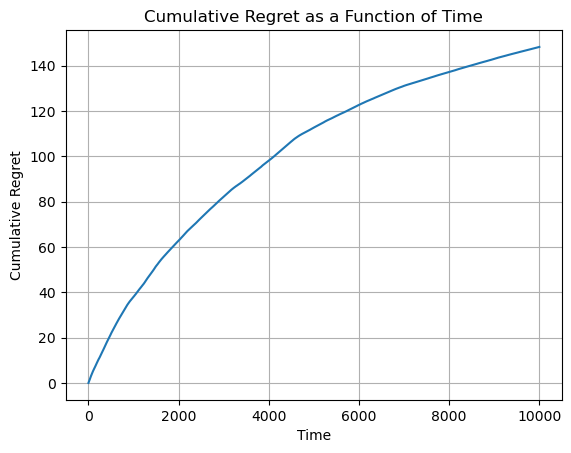

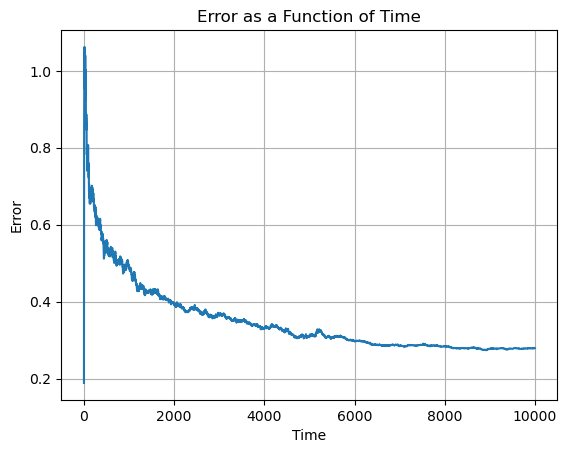

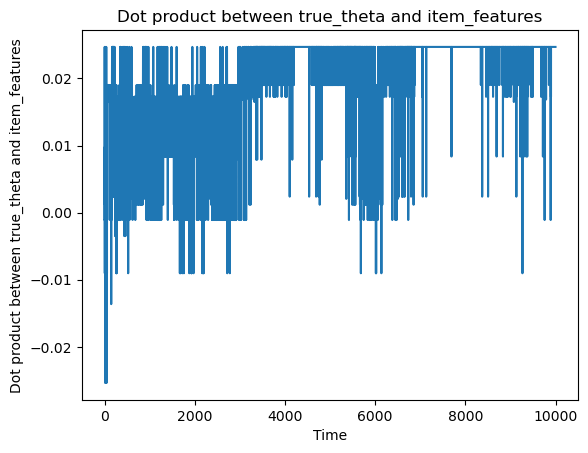

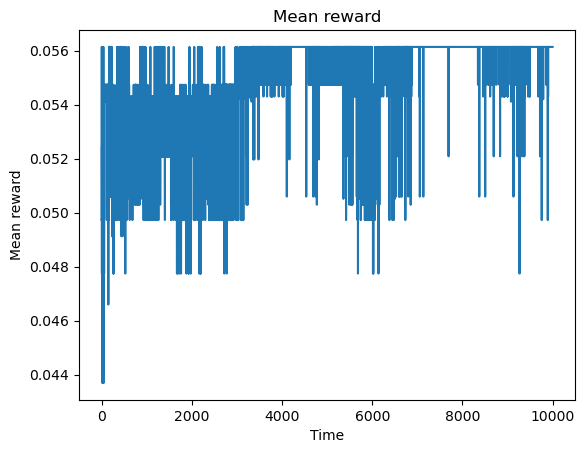

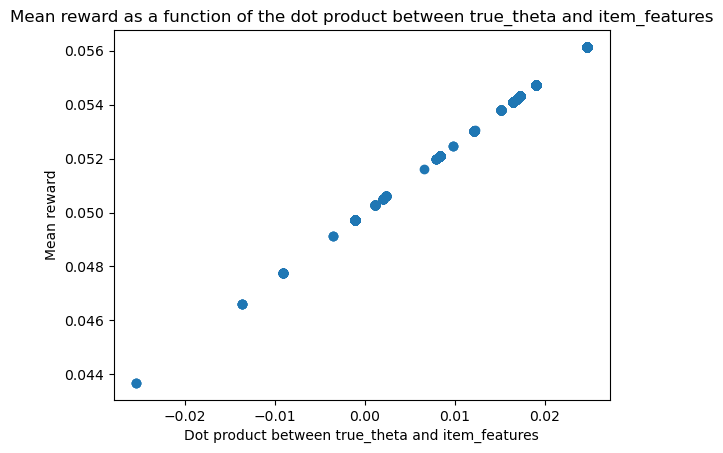

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
# Initialize the environment and the bandit.
d = 10
num_items = 30
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d
num_rounds = 10000

run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs= 20, alpha=0.1, type = 'logistic')


## Varying parameters

### Variation of the number of dimensions

Total progress:   0%|          | 0/30 [00:00<?, ?it/s]

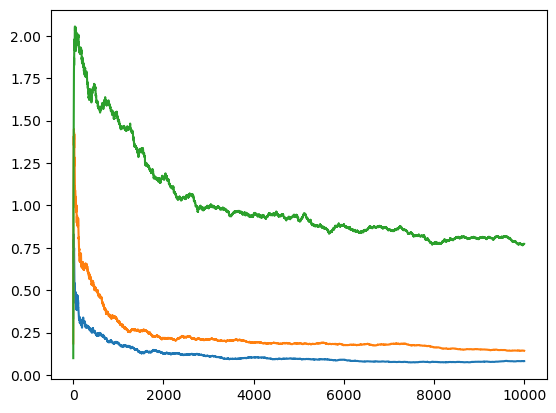

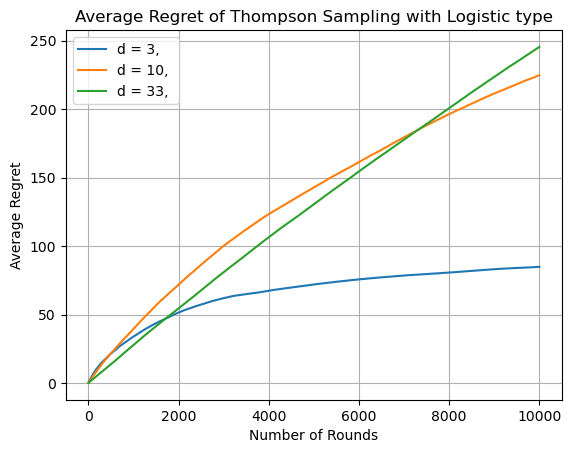

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


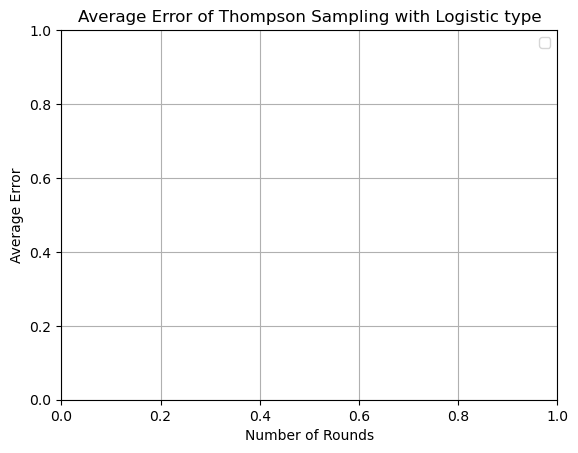

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
d_values = [3, 10, 33]
num_items = [30]
alpha_values = [1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'logistic')

### Variation of the number of items

Total progress:   0%|          | 0/4 [00:00<?, ?it/s]

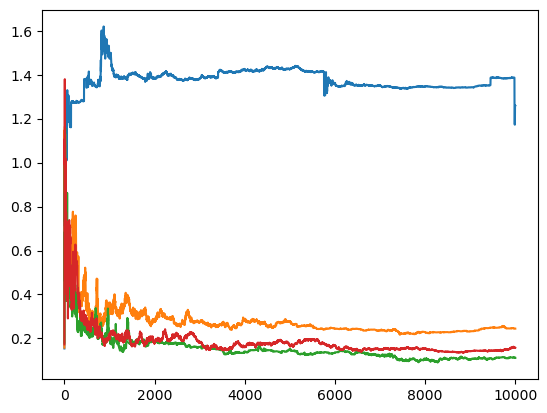

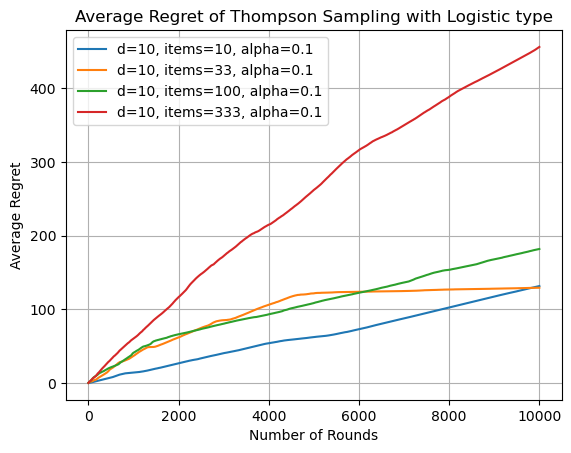

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


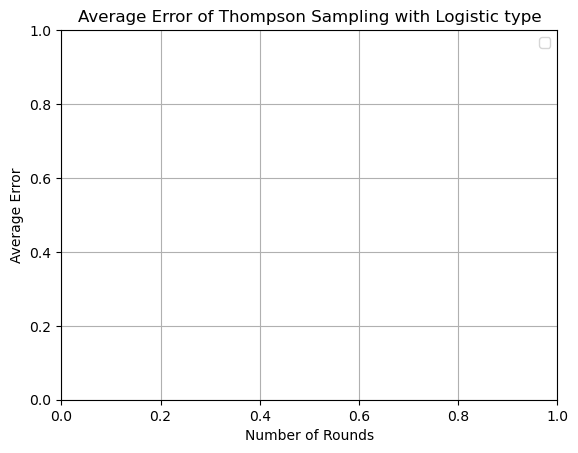

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
d_values2 = [10]
num_items2 = [10, 33, 100, 333]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 1

all_average_regrets = run_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2, type= 'logistic')

Total progress:   0%|          | 0/250 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11727.0
Average number of iteration per rounds in calculate.mle:  1.1727
Total number of iterations in calculate.mle :  11252.0
Average number of iteration per rounds in calculate.mle:  1.1252
Total number of iterations in calculate.mle :  12092.0
Average number of iteration per rounds in calculate.mle:  1.2092
Total number of iterations in calculate.mle :  11450.0
Average number of iteration per rounds in calculate.mle:  1.145
Total number of iterations in calculate.mle :  10913.0
Average number of iteration per rounds in calculate.mle:  1.0913
Total number of iterations in calculate.mle :  10953.0
Average number of iteration per rounds in calculate.mle:  1.0953
Total number of iterations in calculate.mle :  10993.0
Average number of iteration per rounds in calculate.mle:  1.0993
Total number of iterations in calculate.mle :  12109.0
Average number of iteration per rounds in calculate.mle:  1.2109
Total number of iterations in calculate.m

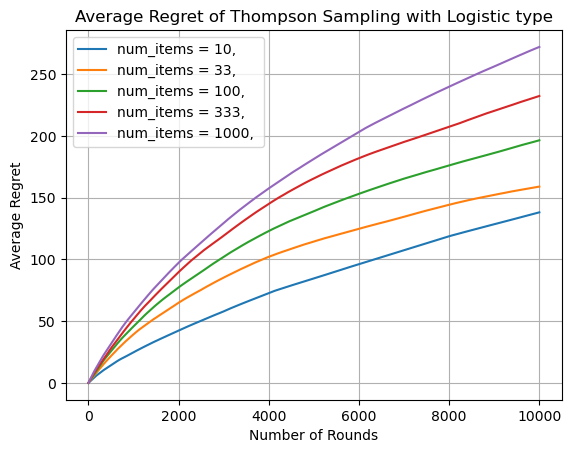

In [5]:
d_values2 = [10]
num_items2 = [10, 33, 100, 333, 1000]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 10

all_average_regrets = run_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2, type= 'logistic')

### Variation of the number of alphas

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11322.0
Average number of iteration per rounds in calculate.mle:  1.1322
Total number of iterations in calculate.mle :  10702.0
Average number of iteration per rounds in calculate.mle:  1.0702
Total number of iterations in calculate.mle :  11304.0
Average number of iteration per rounds in calculate.mle:  1.1304
Total number of iterations in calculate.mle :  10916.0
Average number of iteration per rounds in calculate.mle:  1.0916
Total number of iterations in calculate.mle :  11583.0
Average number of iteration per rounds in calculate.mle:  1.1583
Total number of iterations in calculate.mle :  11062.0
Average number of iteration per rounds in calculate.mle:  1.1062
Total number of iterations in calculate.mle :  10959.0
Average number of iteration per rounds in calculate.mle:  1.0959
Total number of iterations in calculate.mle :  10889.0
Average number of iteration per rounds in calculate.mle:  1.0889
Total number of iterations in calculate.

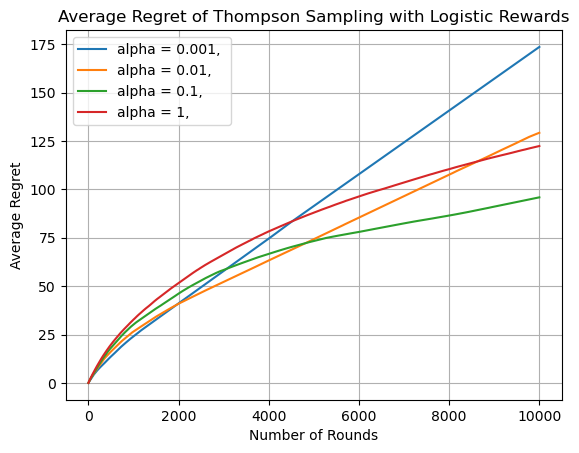

In [4]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11748.0
Average number of iteration per rounds in calculate.mle:  1.1748
Total number of iterations in calculate.mle :  11511.0
Average number of iteration per rounds in calculate.mle:  1.1511
Total number of iterations in calculate.mle :  11827.0
Average number of iteration per rounds in calculate.mle:  1.1827
Total number of iterations in calculate.mle :  12204.0
Average number of iteration per rounds in calculate.mle:  1.2204
Total number of iterations in calculate.mle :  11603.0
Average number of iteration per rounds in calculate.mle:  1.1603
Total number of iterations in calculate.mle :  11504.0
Average number of iteration per rounds in calculate.mle:  1.1504
Total number of iterations in calculate.mle :  11089.0
Average number of iteration per rounds in calculate.mle:  1.1089
Total number of iterations in calculate.mle :  12549.0
Average number of iteration per rounds in calculate.mle:  1.2549
Total number of iterations in calculate.

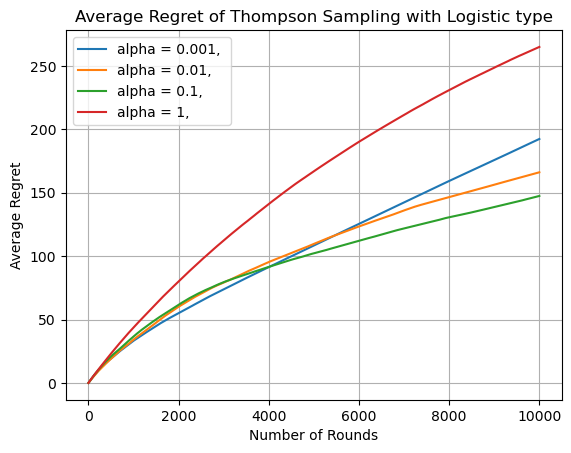

In [5]:
d_values3 = [10]
num_items3 = [30]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11368.0
Average number of iteration per rounds in calculate.mle:  1.1368
Total number of iterations in calculate.mle :  13798.0
Average number of iteration per rounds in calculate.mle:  1.3798
Total number of iterations in calculate.mle :  10858.0
Average number of iteration per rounds in calculate.mle:  1.0858
Total number of iterations in calculate.mle :  11105.0
Average number of iteration per rounds in calculate.mle:  1.1105
Total number of iterations in calculate.mle :  10908.0
Average number of iteration per rounds in calculate.mle:  1.0908
Total number of iterations in calculate.mle :  11575.0
Average number of iteration per rounds in calculate.mle:  1.1575
Total number of iterations in calculate.mle :  13965.0
Average number of iteration per rounds in calculate.mle:  1.3965
Total number of iterations in calculate.mle :  12170.0
Average number of iteration per rounds in calculate.mle:  1.217
Total number of iterations in calculate.m

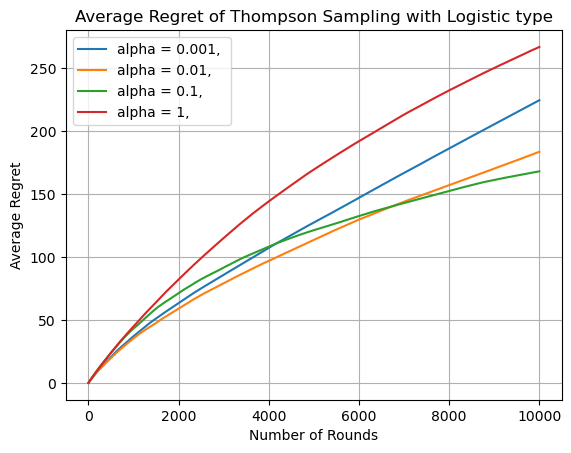

In [6]:
d_values3 = [10]
num_items3 = [50]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

## Comparing GLB TS and Linear TS

### Variation of the number of dimensions

Total progress:   0%|          | 0/120 [00:00<?, ?it/s]

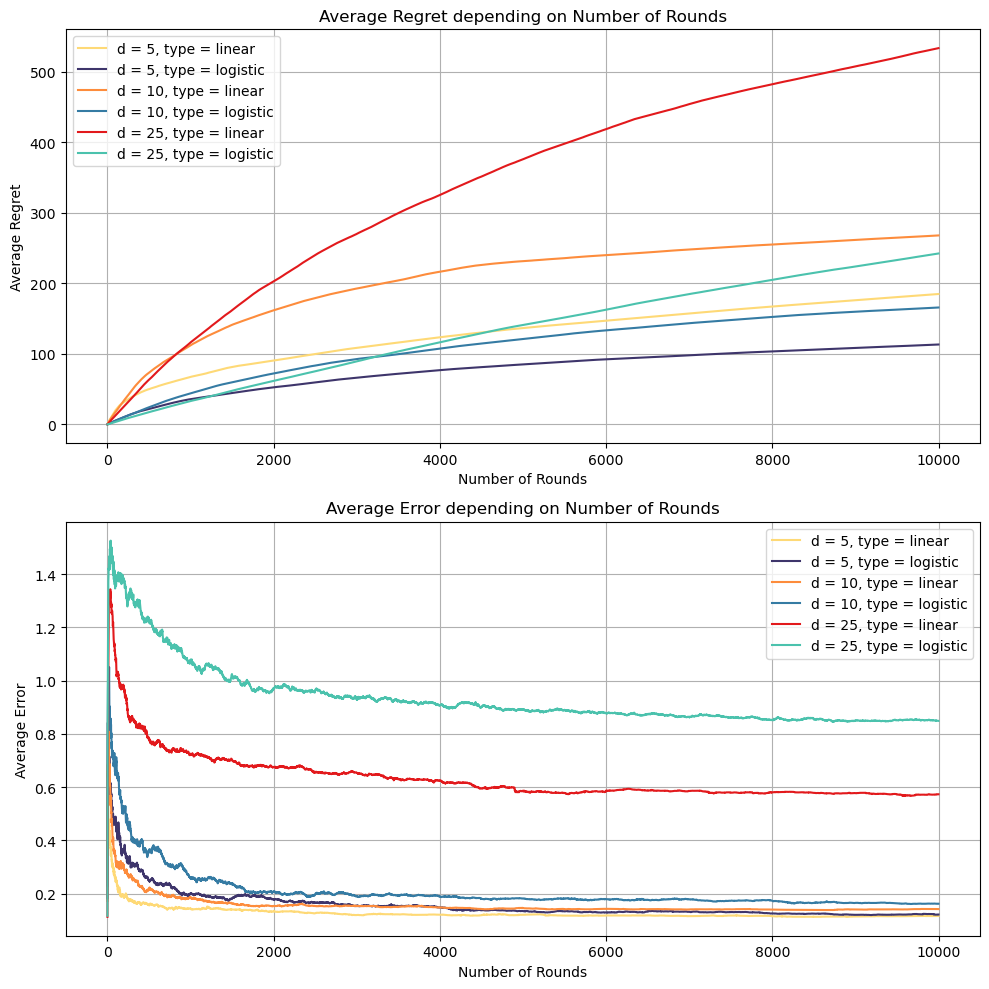

In [3]:
d_values = [5, 10, 25]
num_items = [50]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 20

run_versus_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs)

### Variation of the number of items

Total progress:   0%|          | 0/120 [00:00<?, ?it/s]

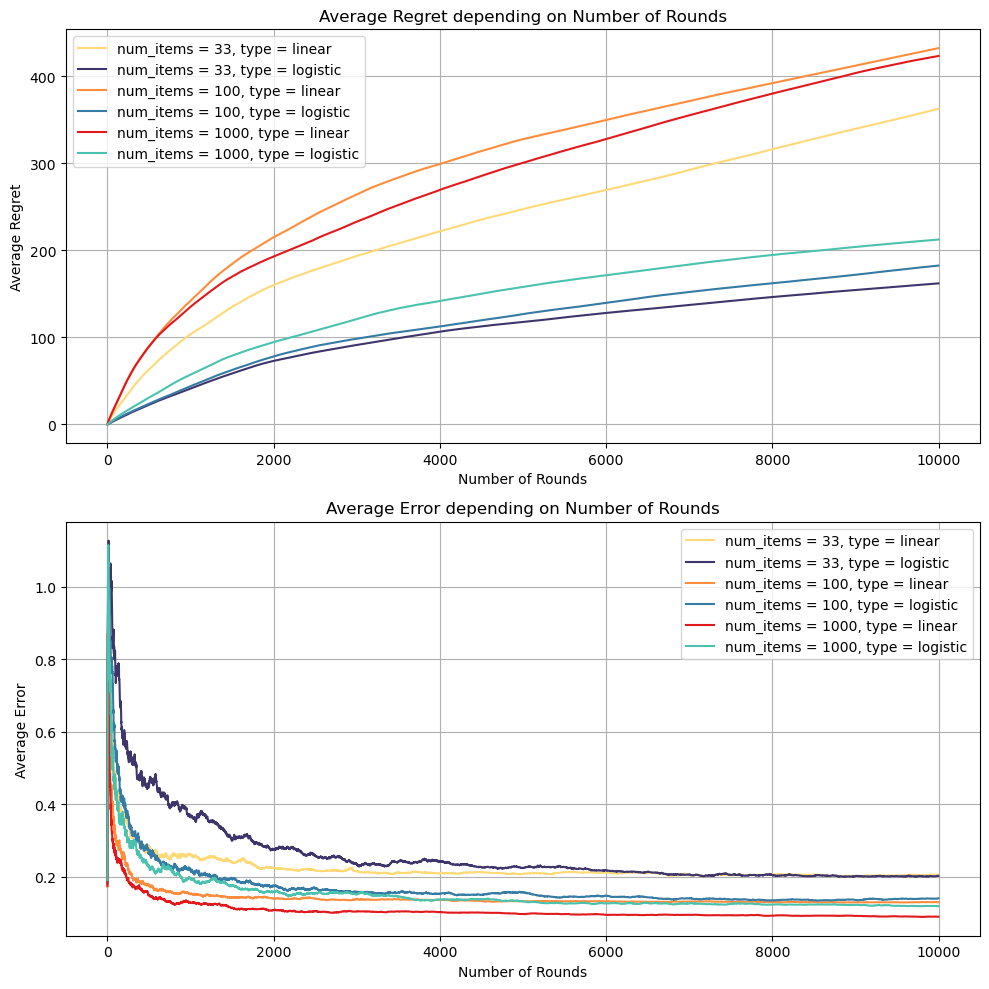

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
d_values2 = [10]
num_items2 = [33, 100, 1000]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 20

run_versus_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2)

### Variation of the number of alphas

Total progress:   0%|          | 0/120 [00:00<?, ?it/s]

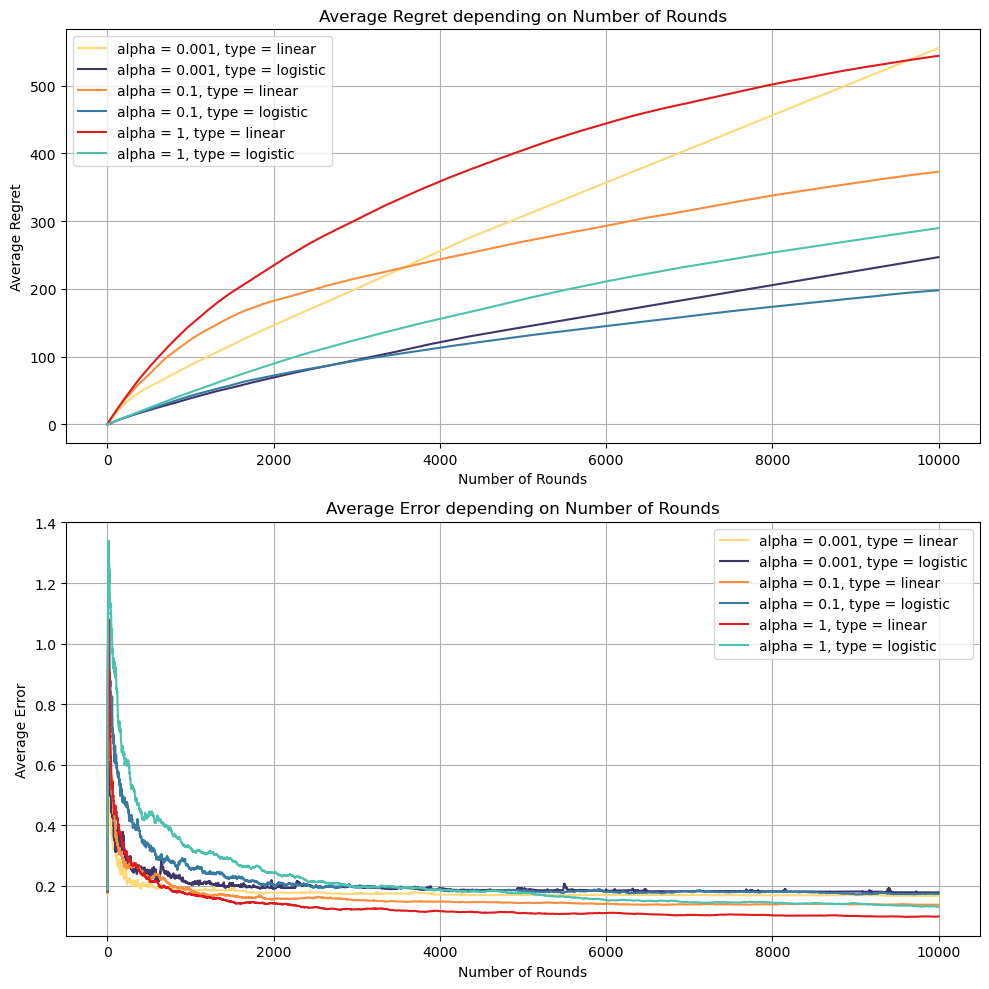

In [2]:
d_values3 = [10]
num_items3 = [50]
alpha_values3 = [0.001, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 20

run_versus_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3)

## Varying true_theta last component ##

Total progress:   0%|          | 0/40 [00:00<?, ?it/s]

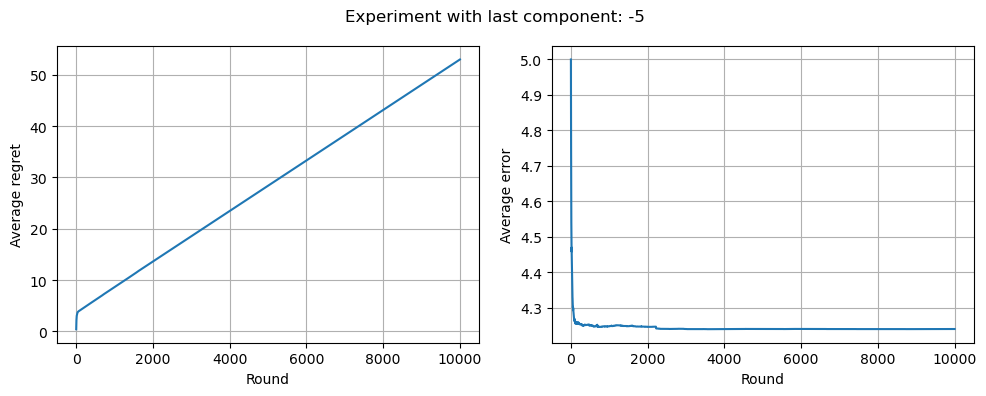

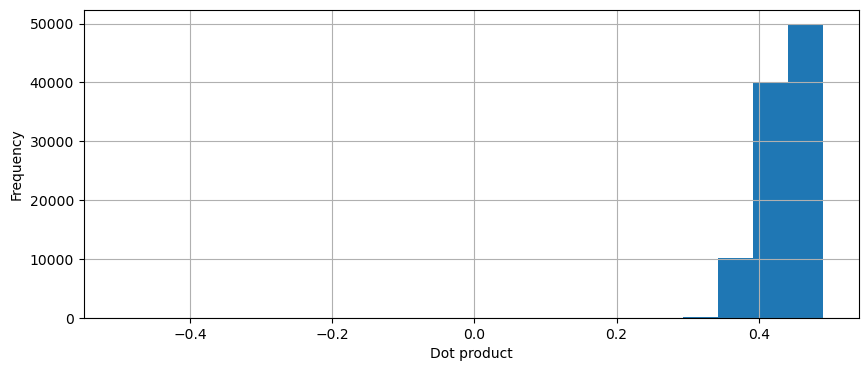

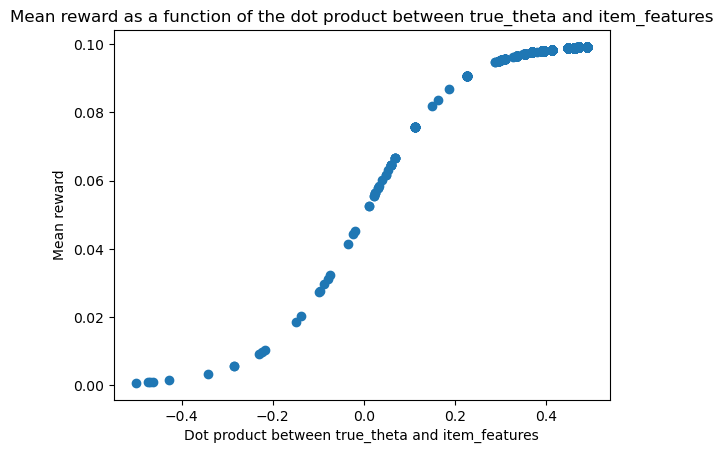

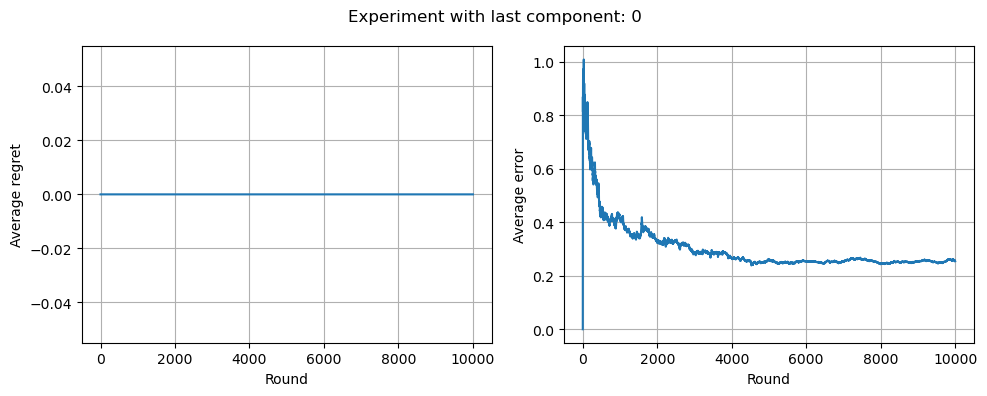

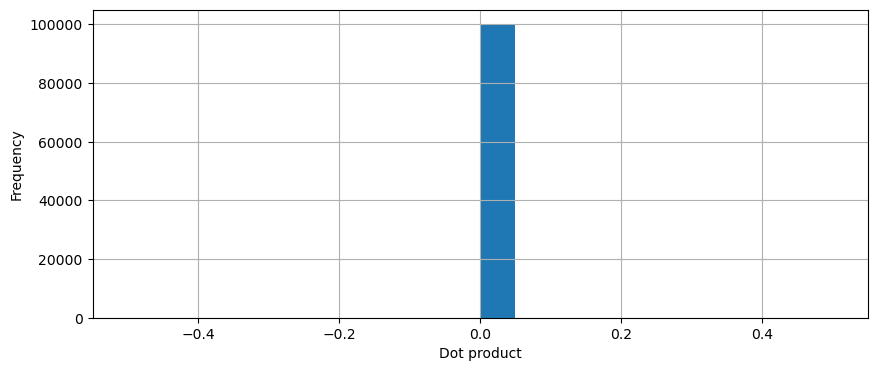

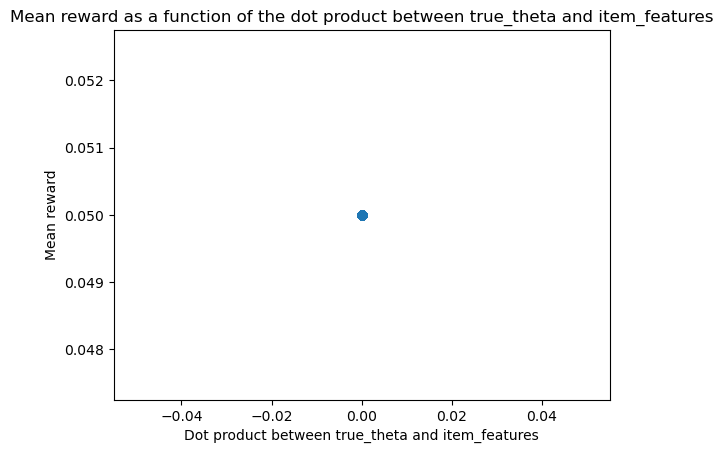

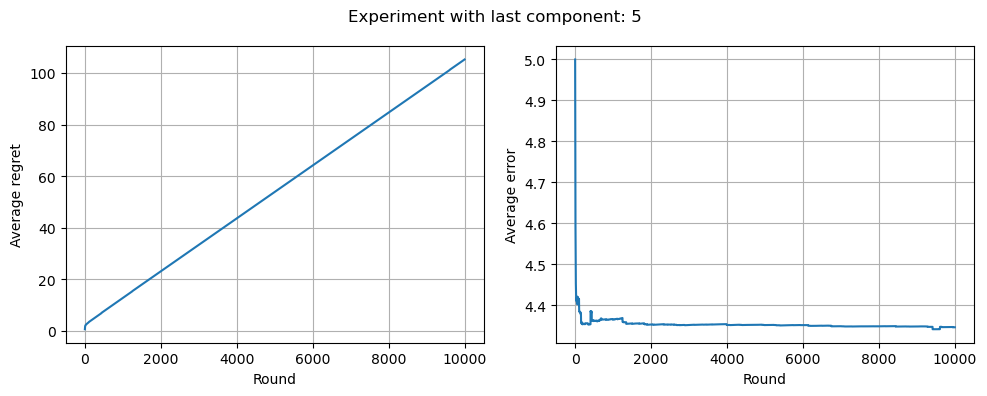

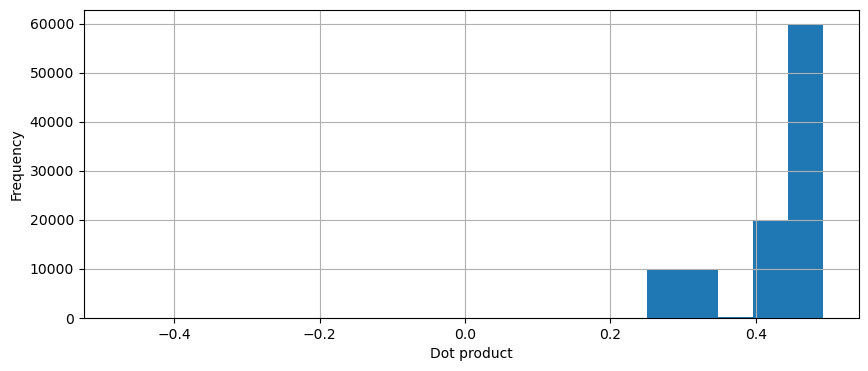

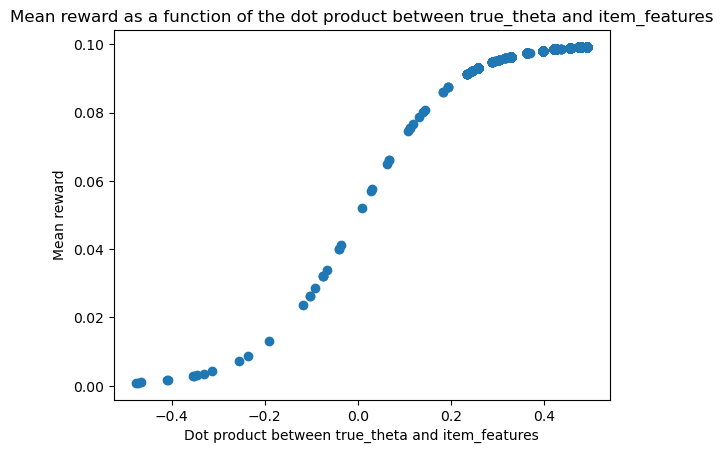

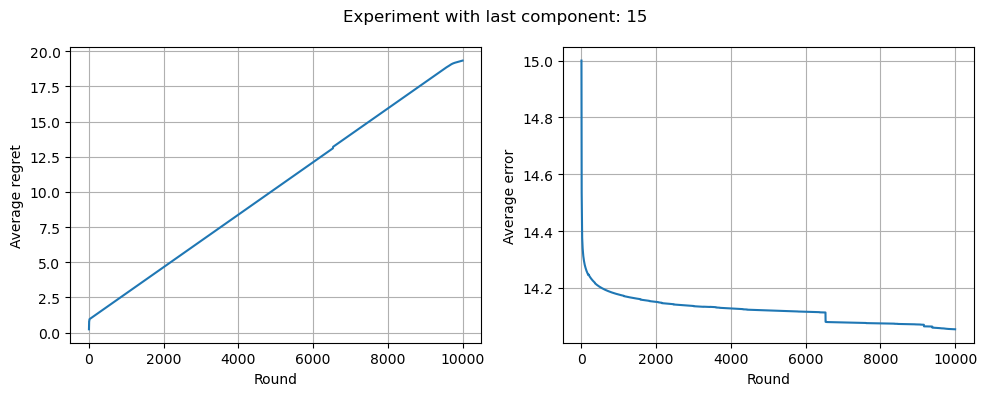

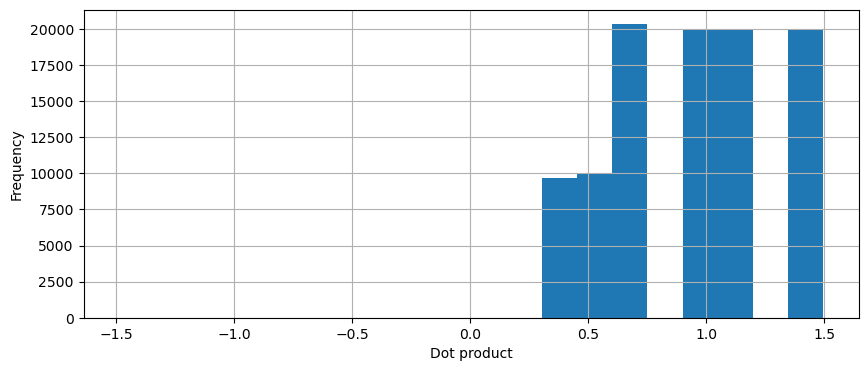

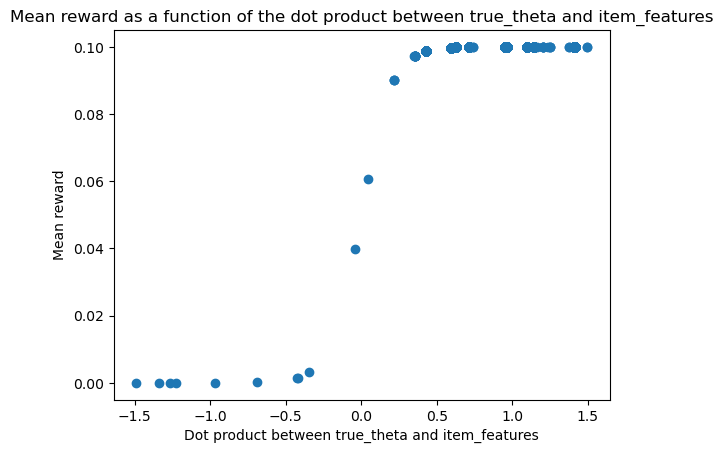

In [4]:
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-5, 0, 5, 15]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 10000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_theta_last_component_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=10, alpha=0.1, type = 'logistic', last_component_array=last_component_values)

Total progress:   0%|          | 0/4 [00:00<?, ?it/s]

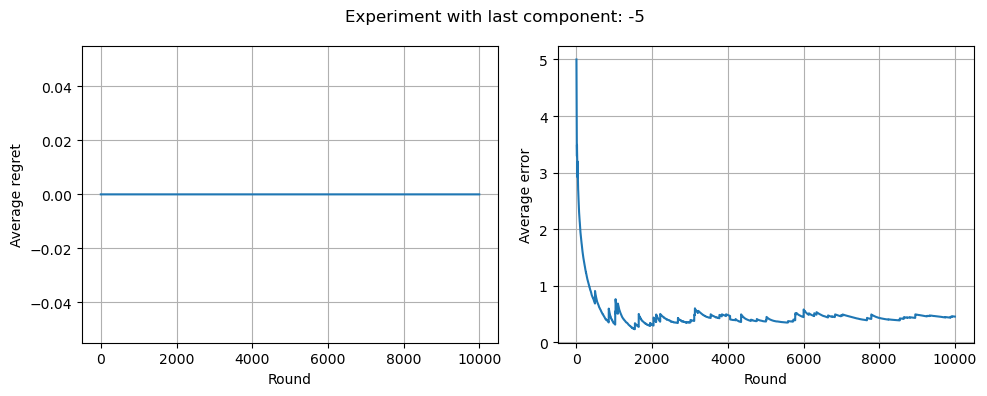

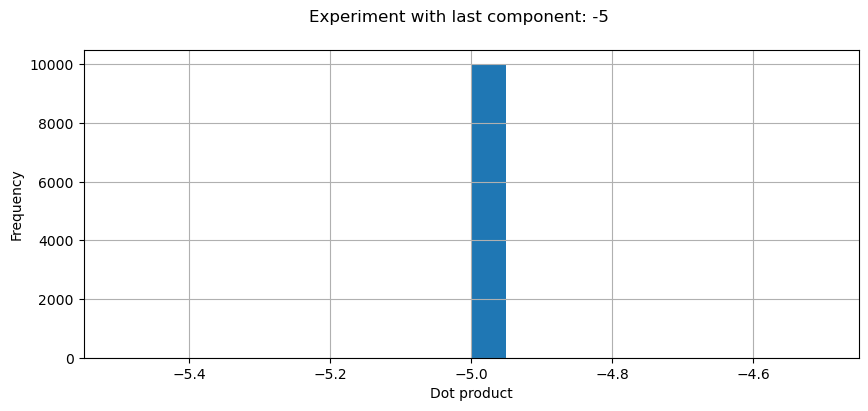

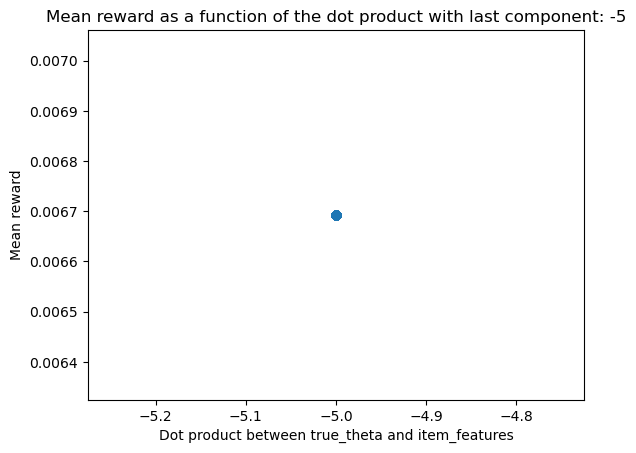

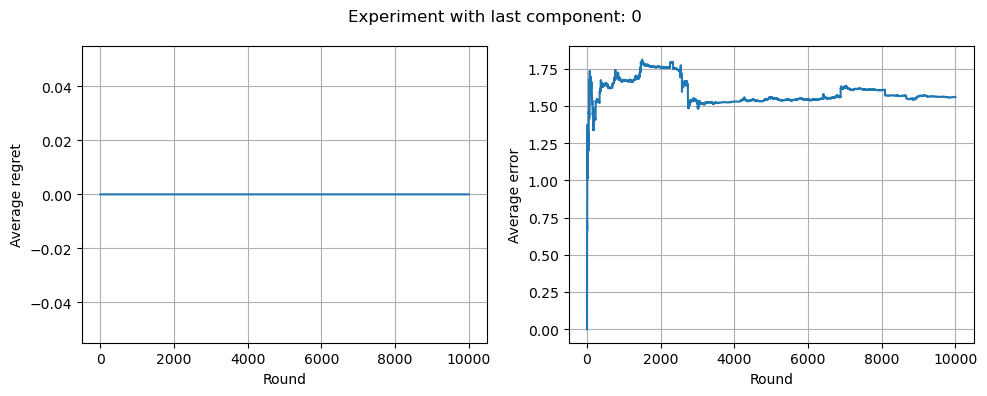

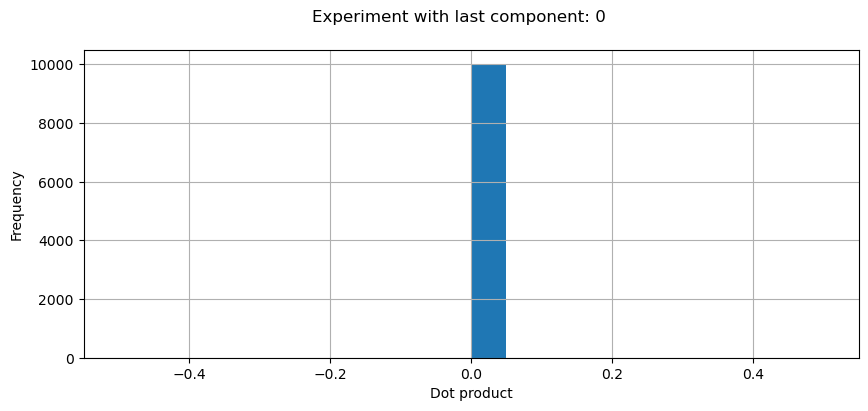

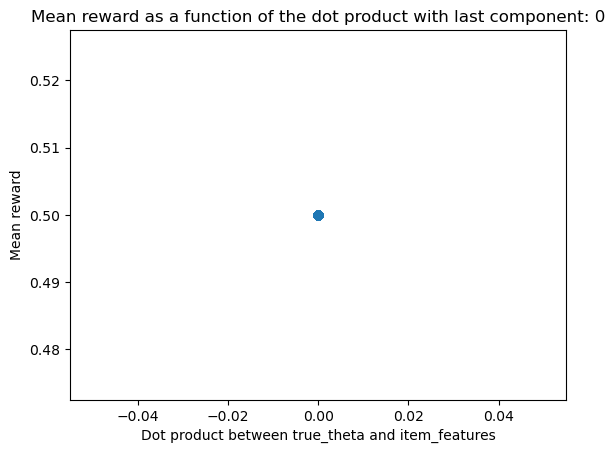

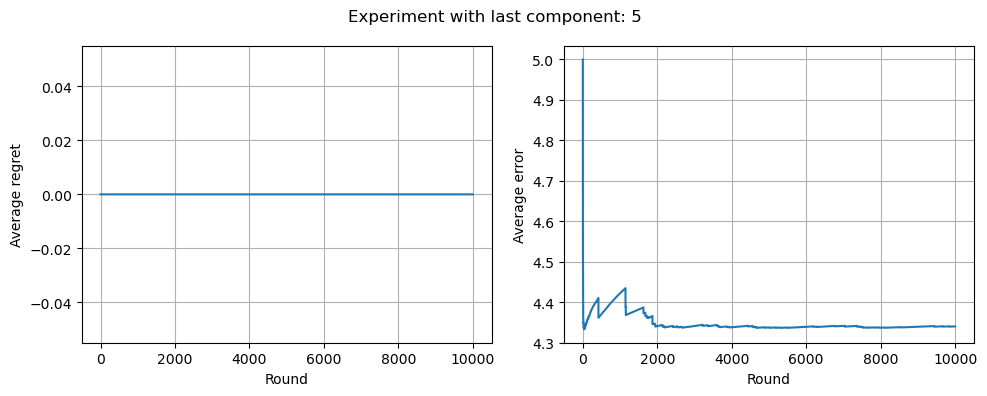

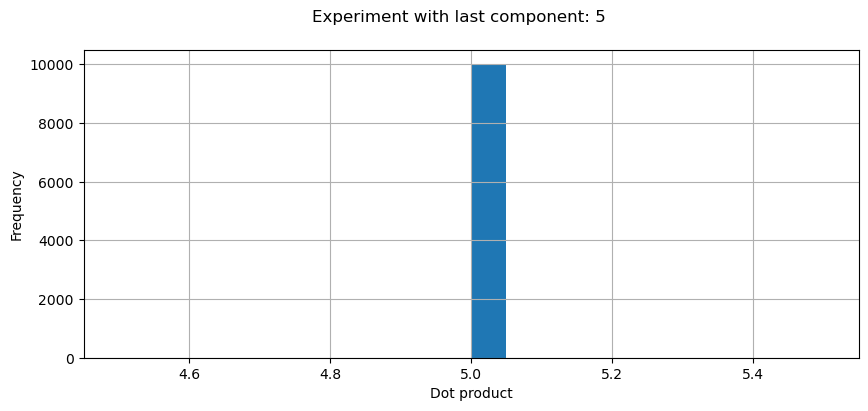

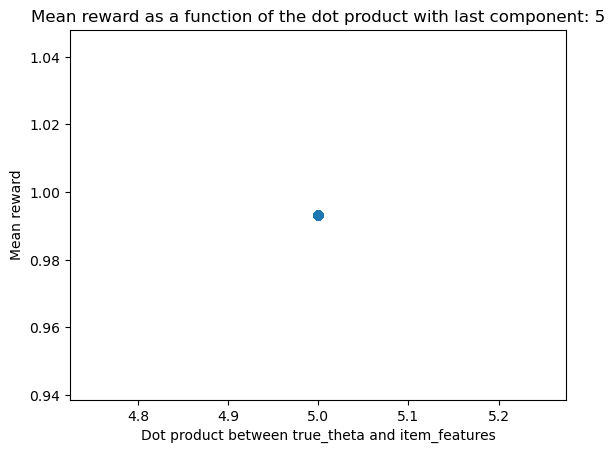

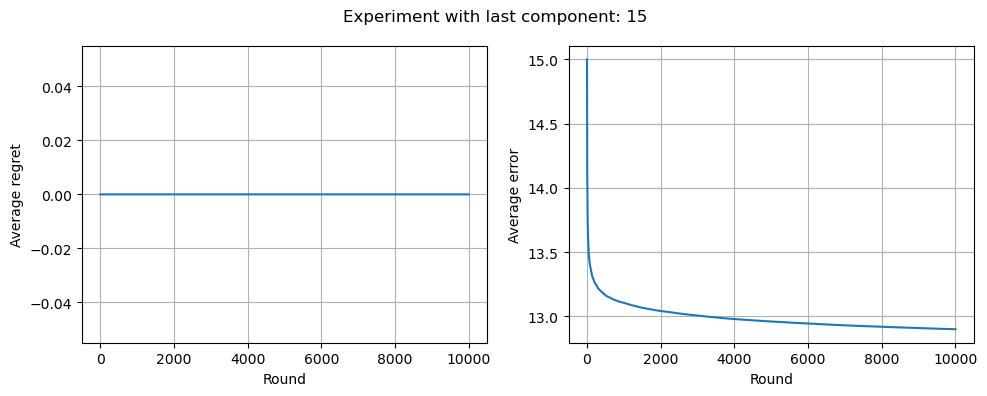

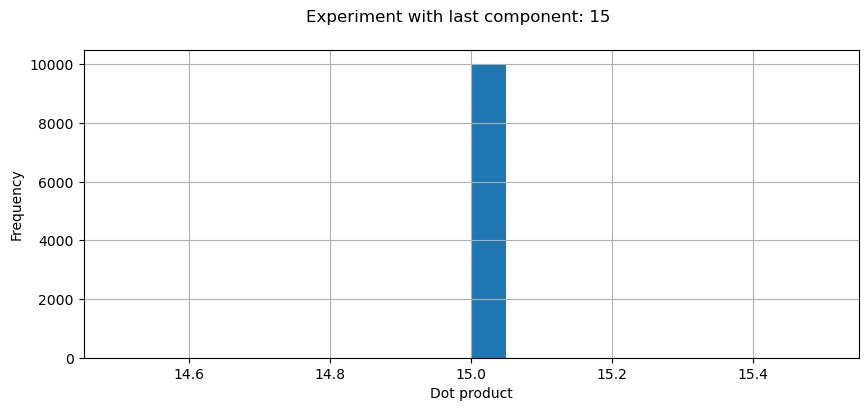

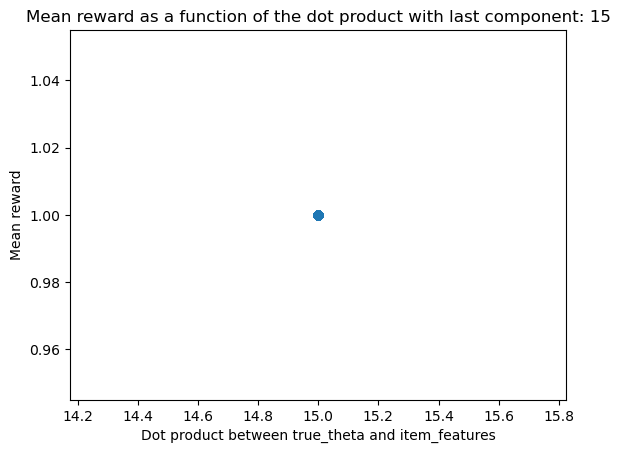

In [1]:
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-5, 0, 5, 15]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 10000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_theta_last_component_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=1, alpha=0.1, type = 'logistic', last_component_array=last_component_values)

Total progress:   0%|          | 0/40 [00:00<?, ?it/s]

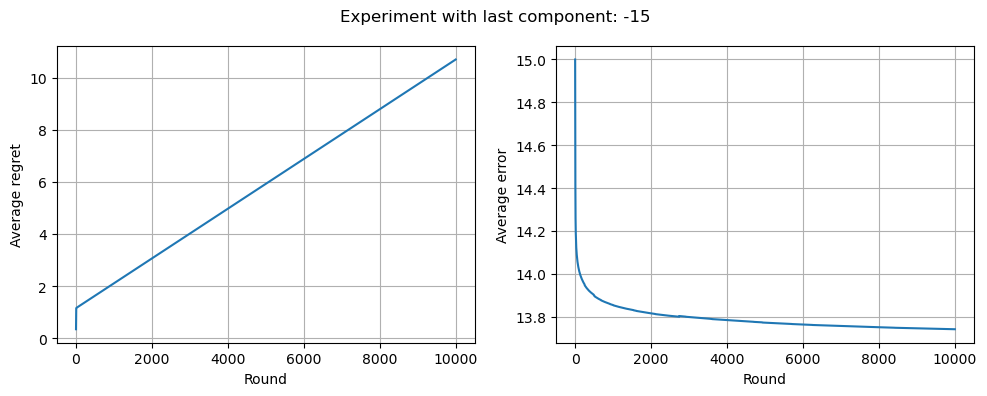

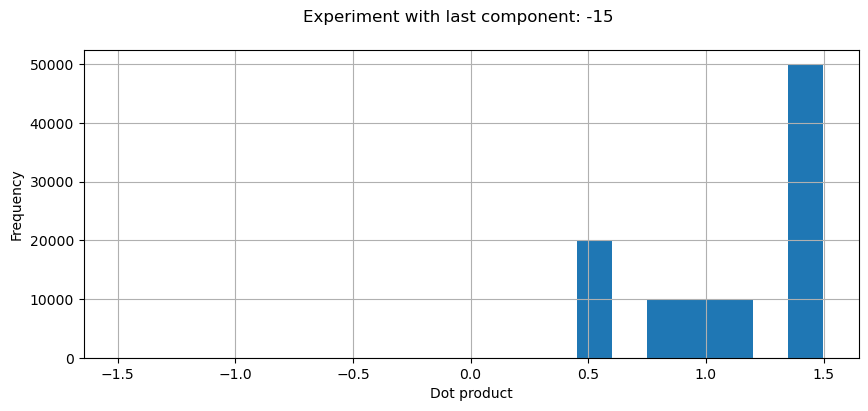

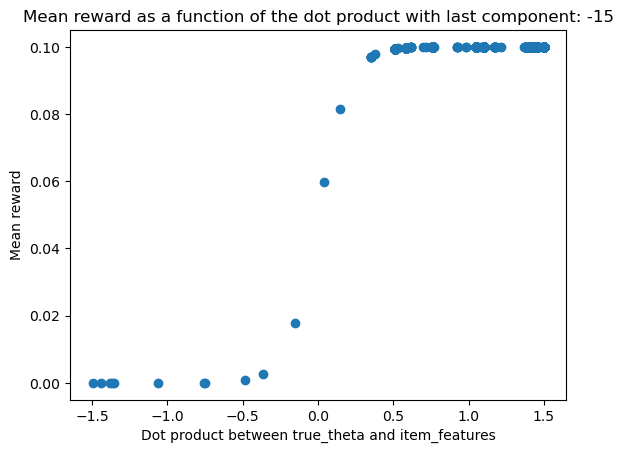

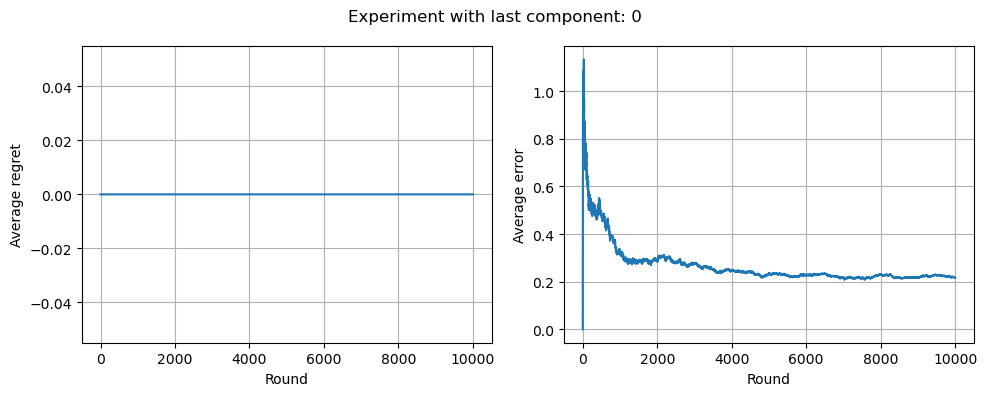

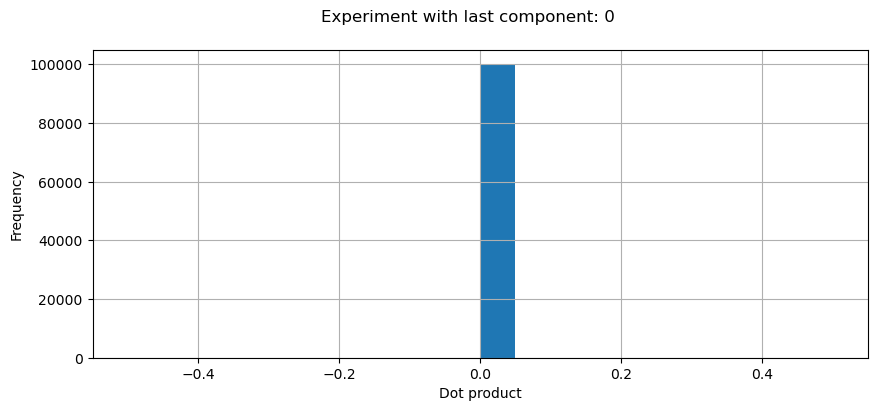

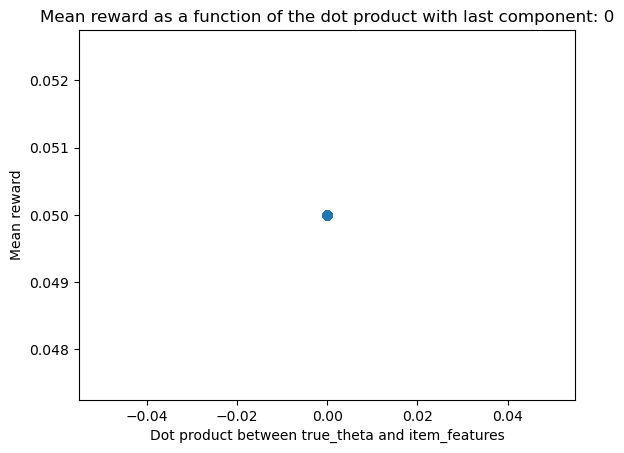

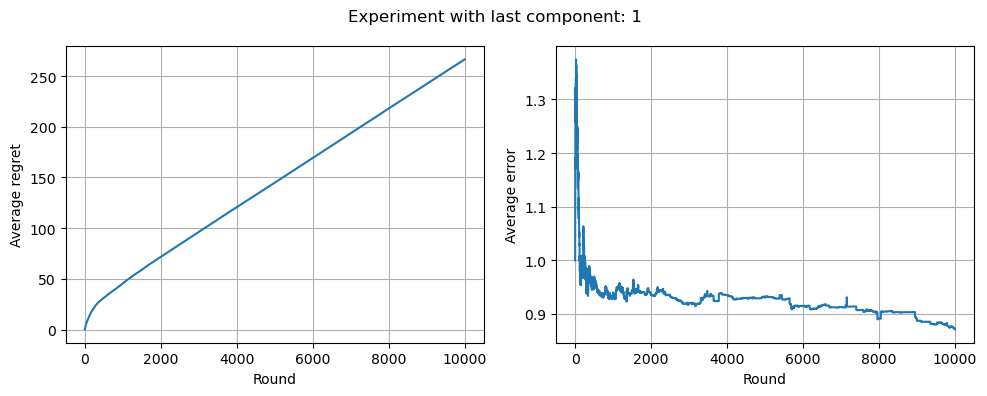

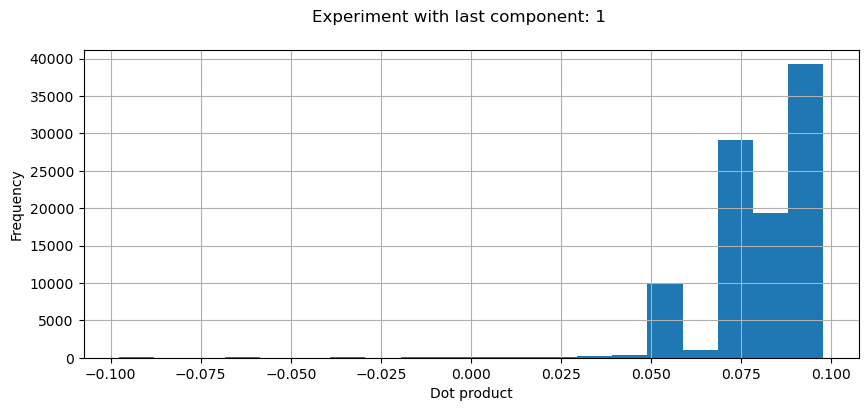

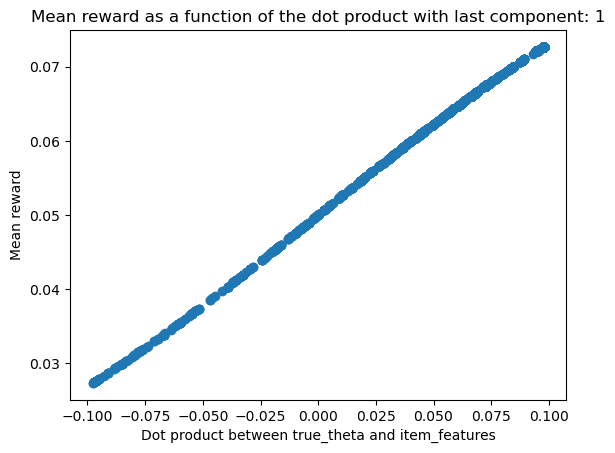

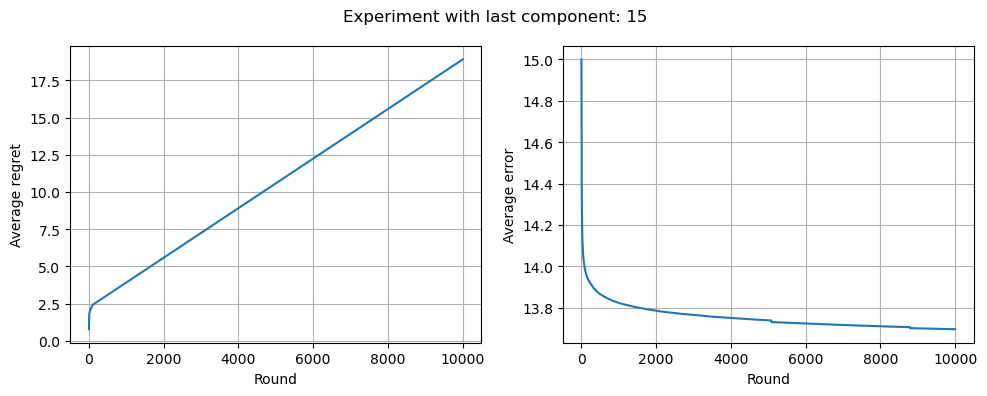

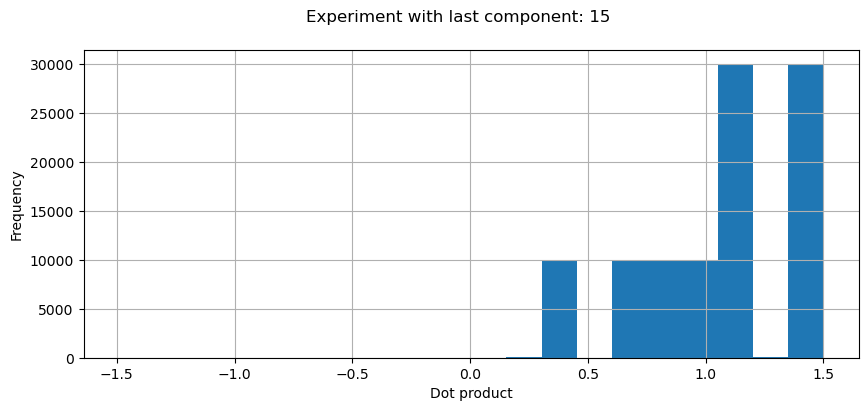

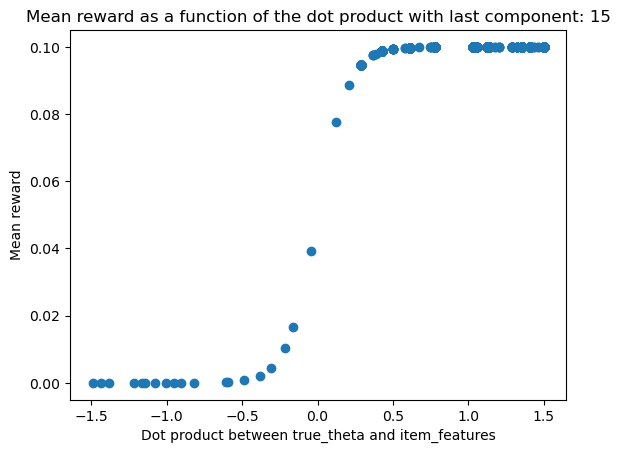

In [2]:
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-15, 0, 1, 15]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 10000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_theta_last_component_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=10, alpha=0.1, type = 'logistic', last_component_array=last_component_values)